<a href="https://colab.research.google.com/github/Kundan7212/Fake-News-Detection-Project/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn nltk

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
print("Libraries and NLTK resources installed successfully!")

Libraries and NLTK resources installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
# Create project directories
!mkdir -p data
!mkdir -p models
!mkdir -p notebooks
!mkdir -p app

print("Project structure created successfully!")

Project structure created successfully!


In [92]:
# Clone your repository
!git clone https://github.com/Kundan7212/Fake-News-Detection-Project.git

# Navigate to the repository
%cd Fake-News-Detection-Project

# Configure git (only needed once)
!git config --global user.email "your-email@example.com"  # Replace with your email
!git config --global user.name "Your Name"  # Replace with your name

print("Repository cloned successfully!")

Cloning into 'Fake-News-Detection-Project'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 4.62 KiB | 4.62 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/Fake-News-Detection-Project/Fake-News-Detection-Project/Fake-News-Detection-Project/Fake-News-Detection-Project/Fake-News-Detection-Project/Fake-News-Detection-Project
Repository cloned successfully!


In [93]:
# Move uploaded files to data directory
!mkdir -p data
!mv Fake.csv data/
!mv True.csv data/

# Check if files are in the data directory
!ls -la data/

mv: cannot stat 'Fake.csv': No such file or directory
mv: cannot stat 'True.csv': No such file or directory
total 8
drwxr-xr-x 2 root root 4096 Mar 30 09:22 .
drwxr-xr-x 5 root root 4096 Mar 30 09:22 ..


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
fake_news = pd.read_csv('/content/Fake-News-Detection-Project/data/Fake.csv')
true_news = pd.read_csv('/content/Fake-News-Detection-Project/data/True.csv')

#('data/Fake.csv')
# Add labels
fake_news['label'] = 0  # 0 for fake
true_news['label'] = 1  # 1 for true

# Combine datasets
all_news = pd.concat([fake_news, true_news])

# Display basic information
print("Fake news dataset shape:", fake_news.shape)
print("True news dataset shape:", true_news.shape)
print("Combined dataset shape:", all_news.shape)

# Display sample data
print("\nFake News Sample:")
display(fake_news.head(2))

print("\nTrue News Sample:")
display(true_news.head(2))

# Check for missing values
print("\nMissing values in the dataset:")
print(all_news.isnull().sum())

# Basic statistics
print("\nDataset Statistics:")
print(f"Total news articles: {len(all_news)}")
print(f"Fake news articles: {len(fake_news)} ({len(fake_news)/len(all_news)*100:.1f}%)")
print(f"True news articles: {len(true_news)} ({len(true_news)/len(all_news)*100:.1f}%)")

Fake news dataset shape: (23481, 5)
True news dataset shape: (21417, 5)
Combined dataset shape: (44898, 5)

Fake News Sample:


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0



True News Sample:


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1



Missing values in the dataset:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Dataset Statistics:
Total news articles: 44898
Fake news articles: 23481 (52.3%)
True news articles: 21417 (47.7%)


<Figure size 1200x600 with 0 Axes>

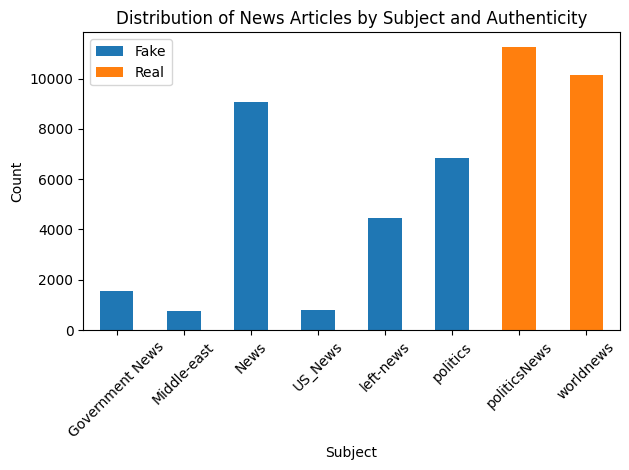

In [95]:
# Plot distribution of news by subject
plt.figure(figsize=(12, 6))
subject_counts = all_news.groupby(['subject', 'label']).size().unstack()
subject_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of News Articles by Subject and Authenticity')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Fake', 'Real'])
plt.tight_layout()
plt.show()


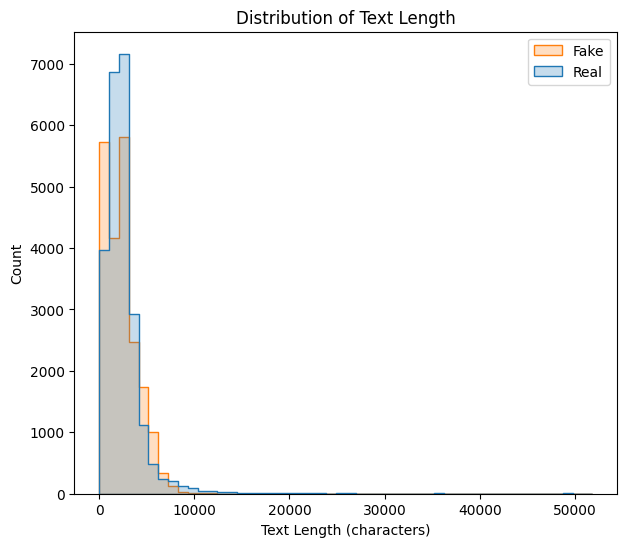

In [96]:
# Text length analysis
all_news['text_length'] = all_news['text'].apply(len)

plt.figure(figsize=(7, 6))
sns.histplot(data=all_news, x='text_length', hue='label', bins=50, element='step')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.legend(['Fake', 'Real'])
plt.show()

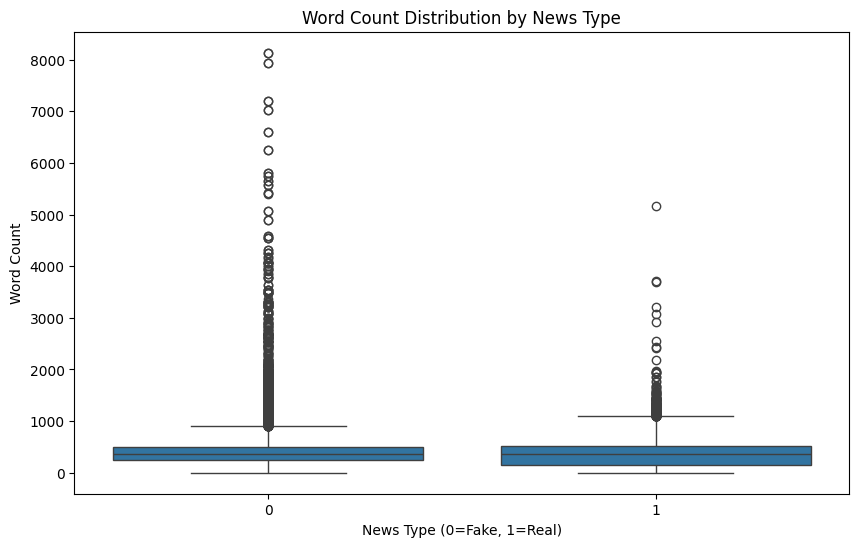

In [97]:
# Word count analysis
all_news['word_count'] = all_news['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(data=all_news, x='label', y='word_count')
plt.title('Word Count Distribution by News Type')
plt.xlabel('News Type (0=Fake, 1=Real)')
plt.ylabel('Word Count')
plt.show()

In [98]:
# Make sure we have all required NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
print("NLTK resources downloaded successfully!")

NLTK resources downloaded successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
def simple_preprocess_text(text):
    """Clean and preprocess text data with simpler tokenization"""
    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Simple tokenization by splitting on whitespace
    tokens = text.split()

    # Remove stopwords and stem
    cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)

# Apply the simpler preprocessing to text
all_news['processed_text'] = all_news['text'].apply(simple_preprocess_text)

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = all_news['processed_text']
y = all_news['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Training set shape:", X_train_tfidf.shape)
print("Testing set shape:", X_test_tfidf.shape)

# Save the vectorizer for later use
import pickle
with open('/content/Fake-News-Detection-Project/models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

Training set shape: (35918, 5000)
Testing set shape: (8980, 5000)


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': conf_matrix
    }

    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Save model
    with open(f'/content/Fake-News-Detection-Project/models/{name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Identify the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

# Save the best model separately
with open('/content/Fake-News-Detection-Project/models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Training Logistic Regression...
Logistic Regression Accuracy: 0.9860
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
[[4661   72]
 [  54 4193]]

Training Naive Bayes...
Naive Bayes Accuracy: 0.9257
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4733
           1       0.93      0.91      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Confusion Matrix:
[[4440  293]
 [ 374 3873]]

Training Random Forest...
Random Forest Accuracy: 0.9973
Classification Report:
     

In [109]:
def predict_news(text, model, vectorizer):
    """Predict if news is real or fake"""
    # Preprocess the text
    processed_text = simple_preprocess_text(text)

    # Vectorize the text
    text_vector = vectorizer.transform([processed_text])

    # Make prediction
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]

    # Return results
    if prediction == 0:
        return {
            'prediction': 'FAKE',
            'confidence': f"{probability[0]*100:.2f}%"
        }
    else:
        return {
            'prediction': 'REAL',
            'confidence': f"{probability[1]*100:.2f}%"
        }

# Test the prediction function
sample_text = "Pope Francis Endorses Donald Trump for President"
prediction = predict_news(sample_text, best_model, tfidf_vectorizer)
print(f"Sample text: '{sample_text}'")
print(f"Prediction: {prediction['prediction']} (Confidence: {prediction['confidence']})")

Sample text: 'Pope Francis Endorses Donald Trump for President'
Prediction: FAKE (Confidence: 91.00%)


In [112]:
%%writefile /content/Fake-News-Detection-Project/app/app.py
import streamlit as st
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load model and vectorizer
@st.cache_resource
def load_models():
    with open('../models/best_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('../models/tfidf_vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
    return model, vectorizer

# Preprocess text function
def preprocess_text(text):
    """Clean and preprocess text data"""
    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and stem
    cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)

# Prediction function
def predict_news(text, model, vectorizer):
    """Predict if news is real or fake"""
    # Preprocess the text
    processed_text = preprocess_text(text)

    # Vectorize the text
    text_vector = vectorizer.transform([processed_text])

    # Make prediction
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]

    # Return results
    if prediction == 0:
        return {
            'prediction': 'FAKE',
            'confidence': f"{probability[0]*100:.2f}%"
        }
    else:
        return {
            'prediction': 'REAL',
            'confidence': f"{probability[1]*100:.2f}%"
        }

# Main function
def main():
    st.title("Fake News Detector")
    st.markdown("""
    This application uses machine learning to detect fake news articles.
    Enter the headline and content of a news article below to check if it's likely real or fake.
    """)

    try:
        model, vectorizer = load_models()

        news_text = st.text_area("Enter news content:", height=200)

        if st.button("Analyze"):
            if len(news_text) < 20:
                st.error("Please enter more text for better analysis.")
            else:
                with st.spinner("Analyzing..."):
                    result = predict_news(news_text, model, vectorizer)

                if result['prediction'] == 'REAL':
                    st.success(f"This news appears to be REAL with {result['confidence']} confidence.")
                else:
                    st.error(f"This news appears to be FAKE with {result['confidence']} confidence.")

                st.info("Note: This is a demonstration model and should not be used as the sole basis for determining the authenticity of news.")

    except Exception as e:
        st.error(f"An error occurred: {e}")
        st.info("Please make sure you've trained the model first and saved it correctly.")

if __name__ == "__main__":
    main()

Overwriting /content/Fake-News-Detection-Project/app/app.py


In [113]:
# Add all files to git
!git add .

# Commit changes
!git commit -m "Complete fake news detection project"

# Push to GitHub
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [124]:
# Load your best model and vectorizer
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Make sure we download ALL required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # This is the one that's causing the error

# Load model and vectorizer
with open('/content/Fake-News-Detection-Project/models/best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)
with open('/content/Fake-News-Detection-Project/models/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Define a simpler preprocessing function that doesn't rely on word_tokenize
def preprocess_text(text):
    """Clean and preprocess text data using a simpler approach"""
    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Simple tokenization by splitting on whitespace (no NLTK required)
    tokens = text.split()

    # Remove stopwords and stem
    cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)

# Prediction function
def predict_news(text, model, vectorizer):
    """Predict if news is real or fake"""
    # Preprocess the text
    processed_text = preprocess_text(text)

    # Vectorize the text
    text_vector = vectorizer.transform([processed_text])

    # Make prediction
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]

    # Return results
    if prediction == 0:
        return {
            'prediction': 'FAKE',
            'confidence': f"{probability[0]*100:.2f}%"
        }
    else:
        return {
            'prediction': 'REAL',
            'confidence': f"{probability[1]*100:.2f}%"
        }

# Test with a sample news article
test_news = """Pope Francis shocks world, endorses Donald Trump for president
VATICAN CITY – In an unexpected move, Pope Francis endorsed Donald Trump for president, saying that Trump's strong leadership is needed in today's world."""

result = predict_news(test_news, best_model, tfidf_vectorizer)
print(f"Prediction: {result['prediction']} (Confidence: {result['confidence']})")

# Let user input their own news to test
from IPython.display import display, HTML
from google.colab import output

def on_analyze(news_text):
  if len(news_text.strip()) < 20:
    print("Please enter more text for better analysis.")
  else:
    result = predict_news(news_text, best_model, tfidf_vectorizer)
    print(f"Prediction: {result['prediction']} with {result['confidence']} confidence")

# Create a simple UI in Colab
display(HTML("""
<textarea id="news_input" style="width: 100%; height: 200px;"
    placeholder="Enter news content here..."></textarea>
<button id="analyze_button">Analyze News</button>
<script>
  document.getElementById('analyze_button').addEventListener('click', function() {
    var news = document.getElementById('news_input').value;
    google.colab.kernel.invokeFunction('notebook.analyze', [news], {});
  });
</script>
"""))

output.register_callback('notebook.analyze', on_analyze)

Prediction: FAKE (Confidence: 91.00%)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Prediction: FAKE with 91.99% confidence
Prediction: FAKE with 98.00% confidence
Prediction: FAKE with 94.00% confidence
Prediction: FAKE with 79.99% confidence
Prediction: FAKE with 79.99% confidence
Prediction: FAKE with 91.90% confidence
Prediction: REAL with 84.00% confidence
Prediction: FAKE with 72.00% confidence
Prediction: REAL with 91.00% confidence
Prediction: FAKE with 72.00% confidence
Prediction: REAL with 71.03% confidence
Prediction: REAL with 73.04% confidence
Prediction: FAKE with 72.00% confidence
Prediction: REAL with 81.00% confidence
Prediction: REAL with 82.00% confidence
Prediction: FAKE with 72.00% confidence
